# Train Models

In [1]:
# !pip install xlrd
# !pip install tabulate

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
import pickle as pkl
import warnings
warnings.filterwarnings('ignore')

In [3]:
final_df = pd.read_excel('Processed_Data.xlsx')

In [4]:
pd.set_option('display.max_columns',None)
final_df

,Female,Male,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Divorced,Married,Single,Data Science,Development,Finance,Human Resources.1,Research & Development,Sales,Business Analyst,Data Scientist,Delivery Manager,Developer,Finance Manager,Healthcare Representative,Human Resources.2,Laboratory Technician,Manager,Manager R&D,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Senior Developer,Senior Manager R&D,Technical Architect,Technical Lead,No,Yes,No.1,Yes.1,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,32,10,3,4,55,2,4,1,12,10,2,10,7,0,8,3
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,47,14,4,4,42,2,1,2,12,20,3,7,7,1,7,3
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,40,5,4,4,48,3,1,5,21,20,3,18,13,1,12,4
3,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,41,10,4,2,73,5,4,3,15,23,2,21,6,12,6,3
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,60,16,4,1,84,2,1,8,14,10,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,27,3,1,4,71,2,4,1,20,6,3,6,5,0,4,4
1196,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,37,10,2,4,80,1,4,3,17,4,3,1,0,0,0,3
1197,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,50,28,1,4,74,1,3,1,11,20,3,20,8,3,8,3
1198,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,34,9,3,4,46,3,2,1,14,9,4,8,7,7,7,3


In [5]:
X=final_df.drop('PerformanceRating',axis=1)
Y=final_df['PerformanceRating']

In [6]:
MMS=MinMaxScaler()
X_scaled=MMS.fit_transform(X)
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled_df

,Female,Male,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Divorced,Married,Single,Data Science,Development,Finance,Human Resources.1,Research & Development,Sales,Business Analyst,Data Scientist,Delivery Manager,Developer,Finance Manager,Healthcare Representative,Human Resources.2,Laboratory Technician,Manager,Manager R&D,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Senior Developer,Senior Manager R&D,Technical Architect,Technical Lead,No,Yes,No.1,Yes.1,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.321429,0.50,1.000000,0.357143,0.25,1.000000,0.111111,0.071429,0.250,0.333333,0.250,0.388889,0.000000,0.470588
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.690476,0.464286,0.75,1.000000,0.171429,0.25,0.000000,0.222222,0.071429,0.500,0.666667,0.175,0.388889,0.066667,0.411765
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.523810,0.142857,0.75,1.000000,0.257143,0.50,0.000000,0.555556,0.714286,0.500,0.666667,0.450,0.722222,0.066667,0.705882
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.547619,0.321429,0.75,0.333333,0.614286,1.00,1.000000,0.333333,0.285714,0.575,0.333333,0.525,0.333333,0.800000,0.352941
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.535714,0.75,0.000000,0.771429,0.25,0.000000,0.888889,0.214286,0.250,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.214286,0.071429,0.00,1.000000,0.585714,0.25,1.000000,0.111111,0.642857,0.150,0.666667,0.150,0.277778,0.000000,0.235294
1196,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.452381,0.321429,0.25,1.000000,0.714286,0.00,1.000000,0.333333,0.428571,0.100,0.666667,0.025,0.000000,0.000000,0.000000
1197,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.761905,0.964286,0.00,1.000000,0.628571,0.00,0.666667,0.111111,0.000000,0.500,0.666667,0.500,0.444444,0.200000,0.470588
1198,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.380952,0.285714,0.50,1.000000,0.228571,0.50,0.333333,0.111111,0.214286,0.225,1.000000,0.200,0.388889,0.466667,0.411765


In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scaled_df, Y, test_size=0.20, random_state=42)

In [8]:
print('Shape of Xtrain :',Xtrain.shape)
print('Shape of Xtest :',Xtest.shape)

Shape of Xtrain : (960, 55)
Shape of Xtest : (240, 55)


#### Three Models We are Applying : Decision Tree, Random Forest and Gradient Boosting
### 1) Decision Tree

In [9]:
DTC=DecisionTreeClassifier()
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [10]:
Ypred=DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))
DTC_acc = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           2       0.79      0.90      0.84        29
           3       0.94      0.92      0.93       184
           4       0.74      0.74      0.74        27

    accuracy                           0.90       240
   macro avg       0.82      0.85      0.84       240
weighted avg       0.90      0.90      0.90       240



In [11]:
Ypred_train=DTC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       690
           4       1.00      1.00      1.00       105

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



#### Testing accuracy is 90%  and Training accuracy is 100%, So Model is overfitting.That's why applying HyperParameter Tuning.

In [12]:
parameters = {"criterion": ['gini', 'entropy'],"splitter": ['best', 'random'],"max_depth": list(range(1, 19)),
              "min_samples_split": list(range(2, 7)),"min_samples_leaf": list(range(1, 5))}
DTC=DecisionTreeClassifier()
Grid=RandomizedSearchCV(estimator=DTC,param_distributions=parameters,scoring="f1",cv=3,random_state=42)
Grid.fit(Xtrain,Ytrain)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='f1')

In [13]:
DTC_best_param = Grid.best_params_
print(DTC_best_param)

{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 11, 'criterion': 'entropy'}


In [14]:
DTC_Hyper = DecisionTreeClassifier(**DTC_best_param)
DTC_Hyper.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=5)

In [15]:
Ypred = DTC_Hyper.predict(Xtest)
print(classification_report(Ytest,Ypred))
DTC_acc_Hyper=accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           2       0.62      0.86      0.72        29
           3       0.93      0.89      0.91       184
           4       0.76      0.70      0.73        27

    accuracy                           0.86       240
   macro avg       0.77      0.82      0.79       240
weighted avg       0.88      0.86      0.87       240



In [16]:
Ypred_train=DTC_Hyper.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

              precision    recall  f1-score   support

           2       0.93      1.00      0.96       165
           3       1.00      0.98      0.99       690
           4       1.00      0.97      0.99       105

    accuracy                           0.98       960
   macro avg       0.97      0.98      0.98       960
weighted avg       0.99      0.98      0.98       960



#### Testing accuracy is 86%  and Training accuracy is 98%. So Model is not overfitting.

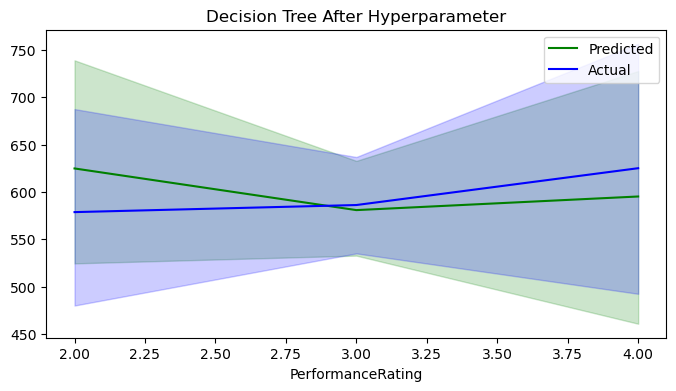

In [17]:
plt.figure(figsize=(8,4))
plt.title('Decision Tree After Hyperparameter')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

### 2) Random Forest

In [18]:
RFC=RandomForestClassifier()
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [19]:
Ypred = RFC.predict(Xtest)
print(classification_report(Ytest,Ypred))
RFC_acc = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           2       0.89      0.83      0.86        29
           3       0.94      0.98      0.96       184
           4       0.95      0.70      0.81        27

    accuracy                           0.93       240
   macro avg       0.93      0.84      0.88       240
weighted avg       0.93      0.93      0.93       240



In [20]:
Ypred_train=RFC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       690
           4       1.00      1.00      1.00       105

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



#### Testing accuracy is 93%  and Training accuracy is 100%, So Model is overfitting.That's why applying HyperParameter Tuning.

In [21]:
parameter = {"n_estimators":[100,200,300,400,500,600],"max_features":['auto', 'sqrt'],"bootstrap":[True, False],
             "criterion":('gini','entropy'),"max_depth":(list(range(8, 18))),"min_samples_split":(list(range(2,6))),
             "min_samples_leaf":(list(range(1, 5)))}

RFC=RandomForestClassifier()
Grid=RandomizedSearchCV(estimator=RFC,param_distributions=parameter,scoring="f1",cv=3,verbose=1,random_state=42)
Grid.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ('gini', 'entropy'),
                                        'max_depth': [8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=42, scoring='f1', verbose=1)

In [22]:
RFC_best_params = Grid.best_params_
print(RFC_best_params)

{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': False}


In [23]:
RFC_Hyper=RandomForestClassifier(**RFC_best_params)
RFC_Hyper.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=500)

In [24]:
Ypred = RFC_Hyper.predict(Xtest)
print(classification_report(Ytest,Ypred))
RFC_acc_Hyper=accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           2       0.89      0.86      0.88        29
           3       0.94      0.98      0.96       184
           4       0.95      0.70      0.81        27

    accuracy                           0.93       240
   macro avg       0.93      0.85      0.88       240
weighted avg       0.93      0.93      0.93       240



In [25]:
Ypred_train = RFC_Hyper.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97       165
           3       0.98      1.00      0.99       690
           4       1.00      0.92      0.96       105

    accuracy                           0.98       960
   macro avg       0.99      0.96      0.97       960
weighted avg       0.98      0.98      0.98       960



#### Testing accuracy is 93%  and Training accuracy is 98%. So Model is not overfitting.

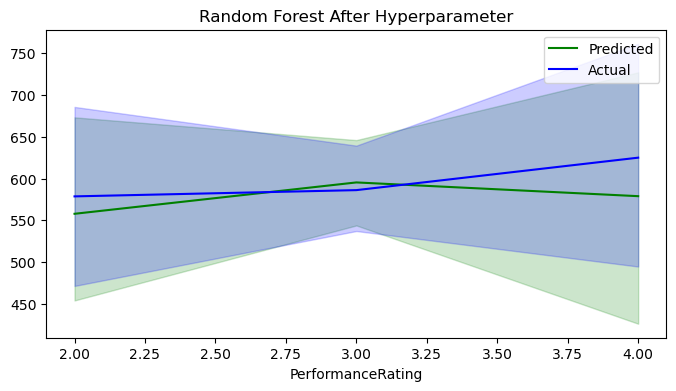

In [26]:
plt.figure(figsize=(8,4))
plt.title('Random Forest After Hyperparameter')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

### 3) Gradient Boosting

In [27]:
GBC=GradientBoostingClassifier()
GBC.fit(Xtrain,Ytrain)

GradientBoostingClassifier()

In [28]:
Ypred = GBC.predict(Xtest)
print(classification_report(Ytest,Ypred))
GBC_acc = accuracy_score(Ytest,Ypred)

              precision    recall  f1-score   support

           2       0.84      0.90      0.87        29
           3       0.95      0.95      0.95       184
           4       0.83      0.74      0.78        27

    accuracy                           0.92       240
   macro avg       0.87      0.86      0.87       240
weighted avg       0.92      0.92      0.92       240



In [29]:
Ypred_train=GBC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       165
           3       0.99      0.99      0.99       690
           4       1.00      0.98      0.99       105

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



#### Testing accuracy is 92%  and Training accuracy is 99%. So Model is not overfitting.

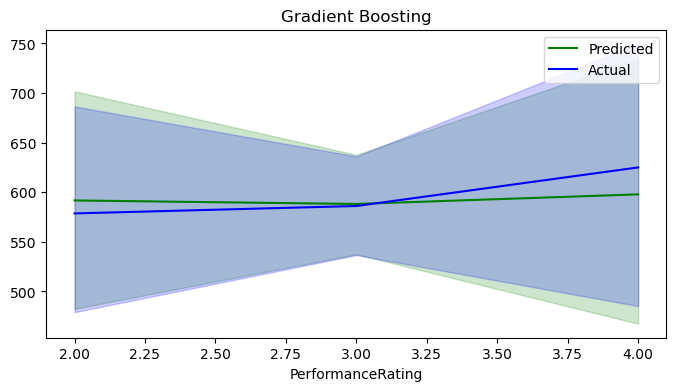

In [30]:
plt.figure(figsize=(8,4))
plt.title('Gradient Boosting')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

### Models Comparision Report

In [33]:
Models = [['Decision Tree',round(DTC_acc*100,2),round(DTC_acc_Hyper*100,2)],
          ['Random Forest',round(RFC_acc*100,2),round(RFC_acc_Hyper*100,2)],
          ['Gradient Boosting',round(GBC_acc*100,2),'NA']]

Head = ['Models','Before Hyper Parameter(%)','After Hyper Parameter(%)']

print(tabulate(Models,headers=Head, tablefmt='grid'))

+-------------------+-----------------------------+----------------------------+
| Models            |   Before Hyper Parameter(%) | After Hyper Parameter(%)   |
+===================+=============================+============================+
| Decision Tree     |                       90    | 86.25                      |
+-------------------+-----------------------------+----------------------------+
| Random Forest     |                       93.33 | 93.33                      |
+-------------------+-----------------------------+----------------------------+
| Gradient Boosting |                       92.08 | NA                         |
+-------------------+-----------------------------+----------------------------+


### Save Models Into Pickle Files for Prediction

In [35]:
with open('DTC.pkl','wb') as f:
    pkl.dump(DTC_Hyper,f)

with open('RFC.pkl','wb') as f:
    pkl.dump(RFC_Hyper,f)

with open('GBC.pkl','wb') as f:
    pkl.dump(GBC,f)